IMPORTING LIBRARIES AND DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('C:/Users/ADMIN/Desktop/restaurant_customer_satisfaction.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


CHECKING FOR MISSING VALUES

In [6]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

SIZE OF NUMBER THAT VISIT FREQUENTLY

In [9]:
df.groupby('VisitFrequency')[['GroupSize']].value_counts()

VisitFrequency  GroupSize
Daily           1            22
                9            22
                7            21
                4            19
                8            19
                6            17
                5            13
                2            11
                3             9
Monthly         2            58
                4            53
                6            49
                9            49
                7            46
                3            45
                8            45
                1            44
                5            39
Rarely          8            41
                2            39
                4            39
                1            37
                5            35
                6            33
                7            32
                3            31
                9            26
Weekly          7            78
                3            77
                8            75
              

VISIT FREQUENCY BASED ON GENDER

In [11]:
df.groupby('Gender')['VisitFrequency'].value_counts()

Gender  VisitFrequency
Female  Weekly            311
        Monthly           214
        Rarely            154
        Daily              80
Male    Weekly            295
        Monthly           214
        Rarely            159
        Daily              73
Name: count, dtype: int64

DATA VISUALIZATION

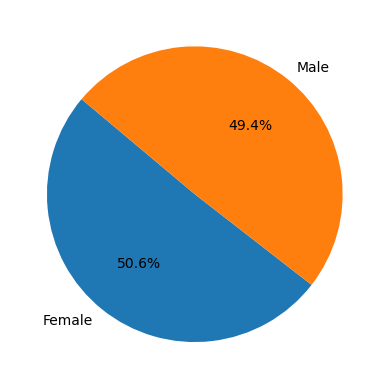

In [13]:
pp=df['Gender'].value_counts()
plt.pie(pp, labels=pp.index, autopct='%1.1f%%', startangle=140)
plt.show()

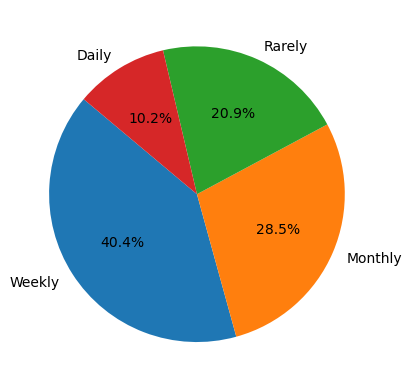

In [14]:
p1=df['VisitFrequency'].value_counts()
plt.pie(p1, labels=p1.index, autopct='%1.1f%%', startangle=140)
plt.show()

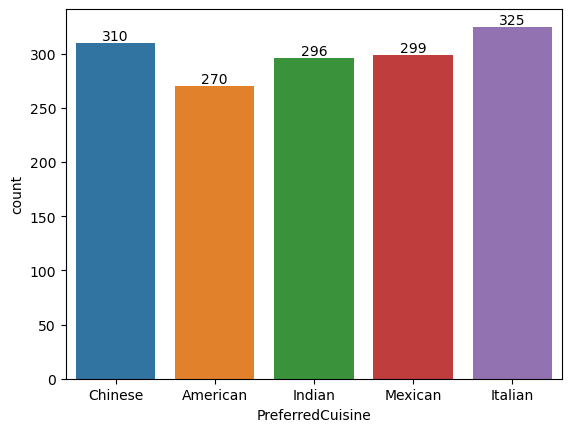

In [15]:
p2=sns.countplot(df, x='PreferredCuisine', hue='PreferredCuisine')
for bars in p2.containers:
    p2.bar_label(bars)
plt.show()   
    

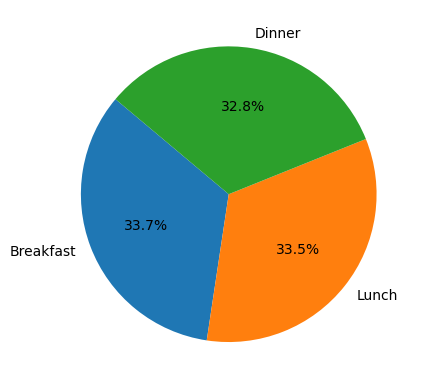

In [16]:
p3=df['TimeOfVisit'].value_counts()
plt.pie(p3, labels=p3.index, autopct='%1.1f%%', startangle=140)
plt.show()

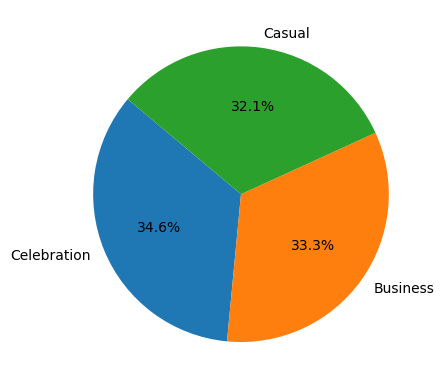

In [17]:
p4=df['DiningOccasion'].value_counts()
plt.pie(p4, labels=p4.index, autopct='%1.1f%%', startangle=140)
plt.show()

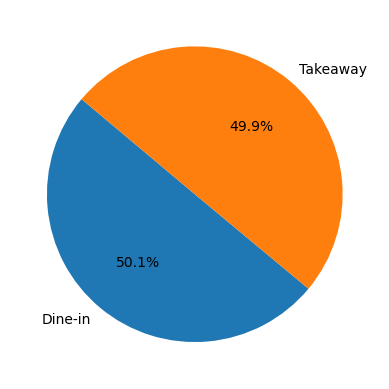

In [18]:
p5=df['MealType'].value_counts()
plt.pie(p5, labels=p5.index, autopct='%1.1f%%', startangle=140)
plt.show()

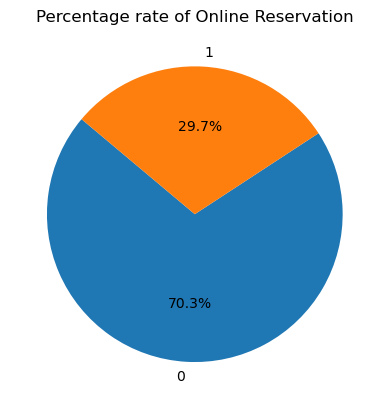

In [19]:
p6=df['OnlineReservation'].value_counts()
plt.pie(p6, labels=p6.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage rate of Online Reservation')
plt.show()

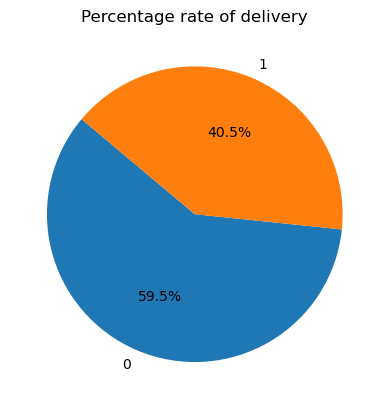

In [20]:
p7=df['DeliveryOrder'].value_counts()
plt.pie(p7, labels=p7.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage rate of delivery')
plt.show()

In [21]:
df['DeliveryOrder'].value_counts()

DeliveryOrder
0    892
1    608
Name: count, dtype: int64

ENCODING SOME COLUMNS IN THE DATASET

In [23]:
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()
df['Gender']=enco.fit_transform(df['Gender'])
df['VisitFrequency']=enco.fit_transform(df['VisitFrequency'])
df['PreferredCuisine']=enco.fit_transform(df['PreferredCuisine'])
df['TimeOfVisit']=enco.fit_transform(df['TimeOfVisit'])
df['DiningOccasion']=enco.fit_transform(df['DiningOccasion'])
df['MealType']=enco.fit_transform(df['MealType'])

In [24]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

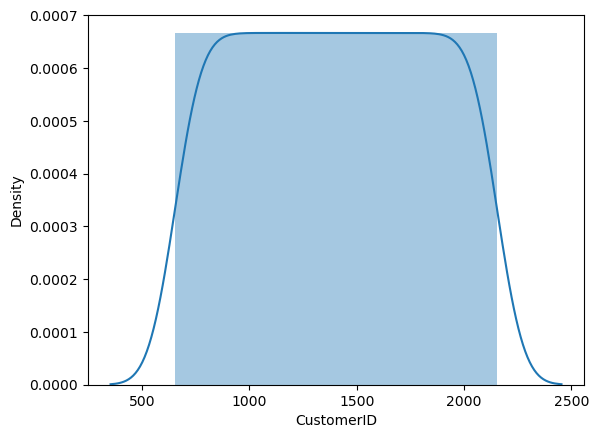

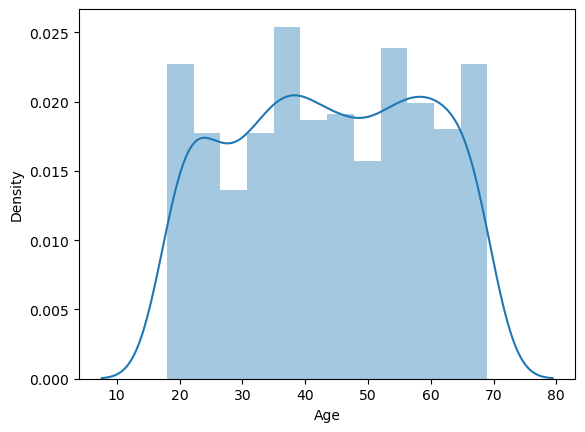

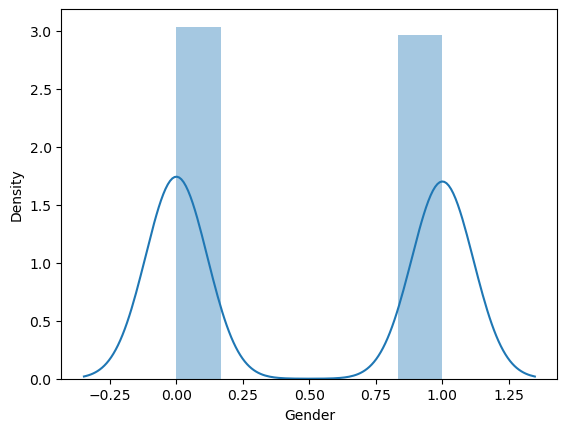

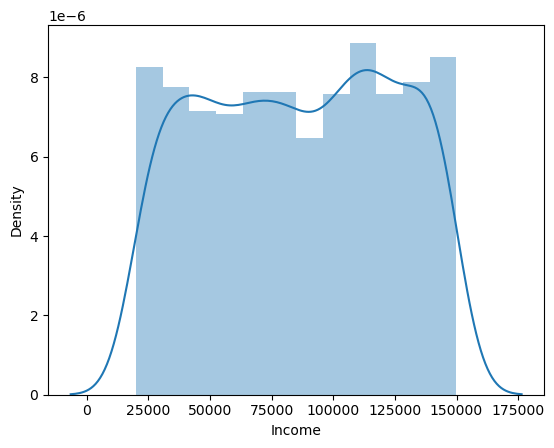

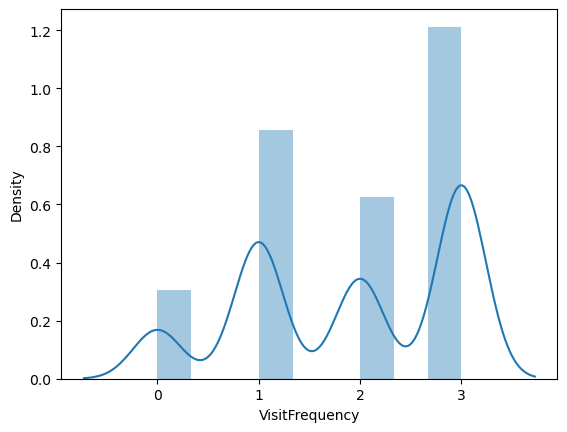

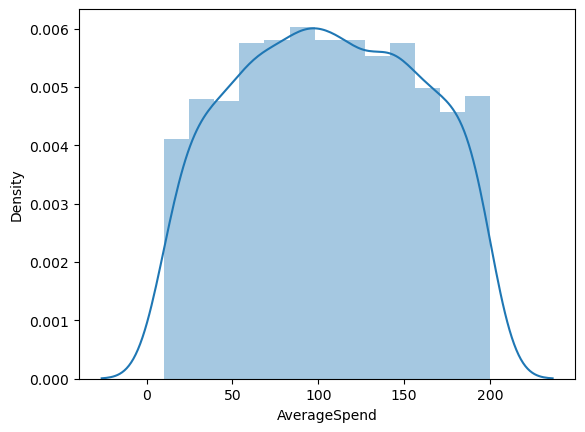

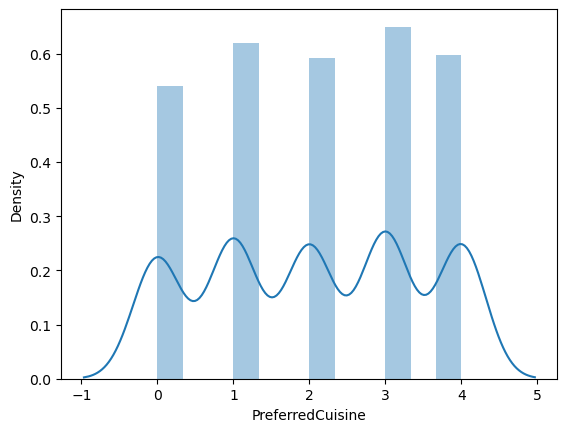

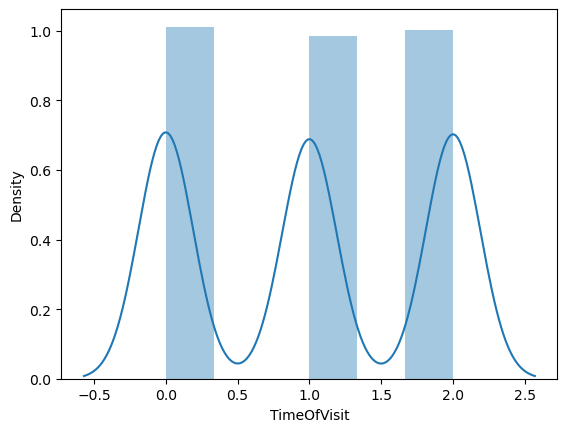

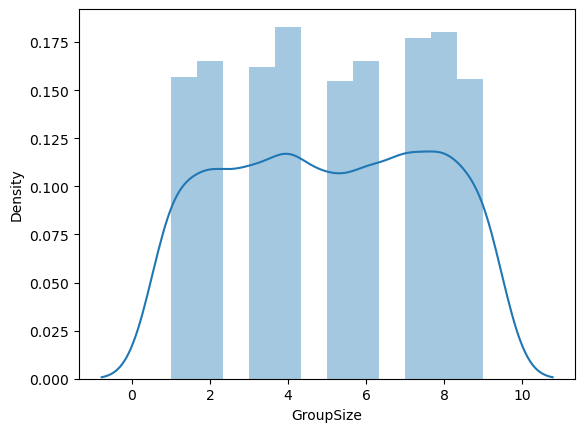

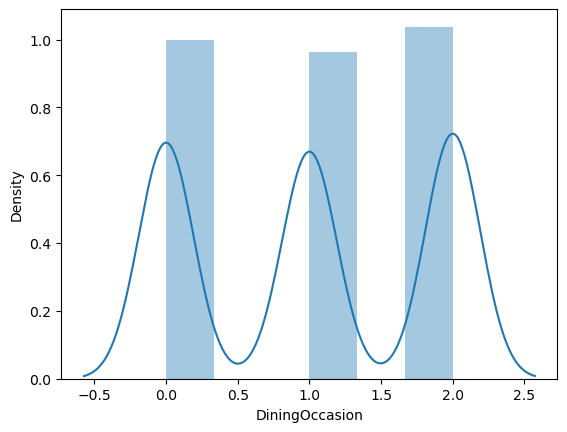

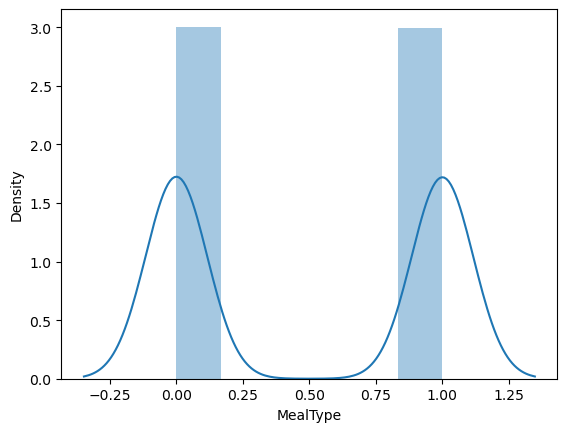

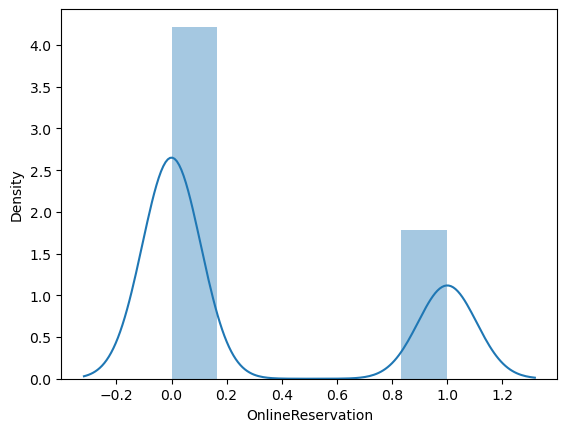

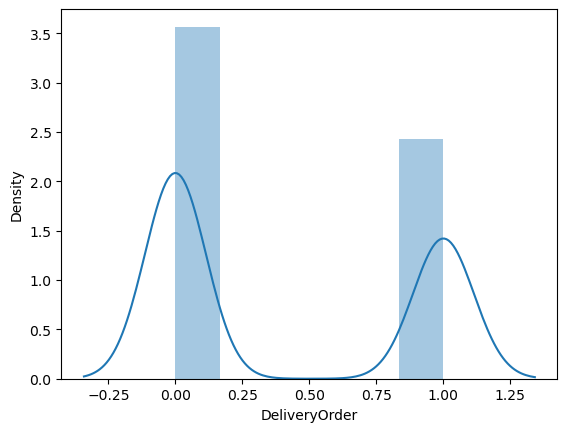

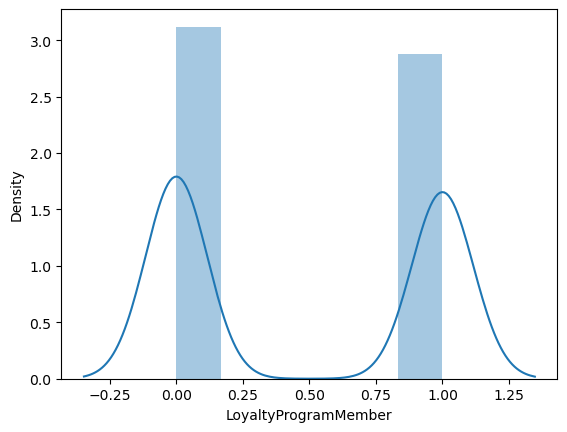

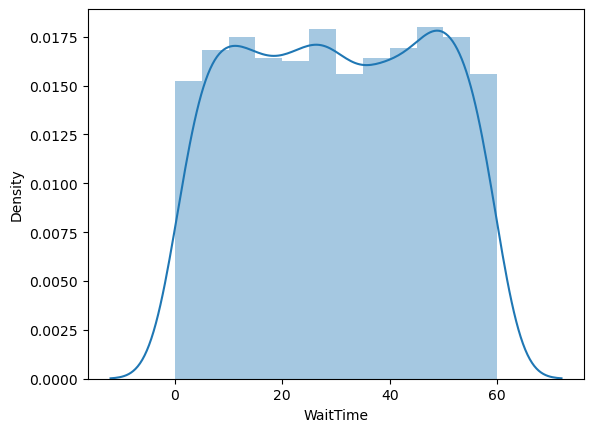

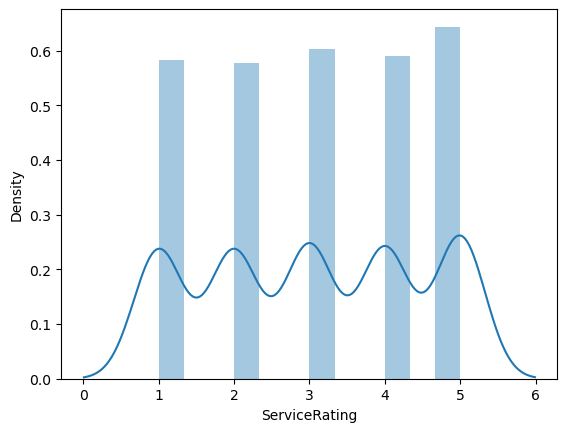

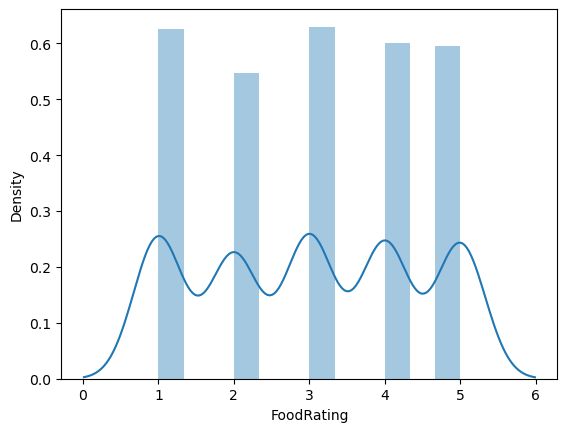

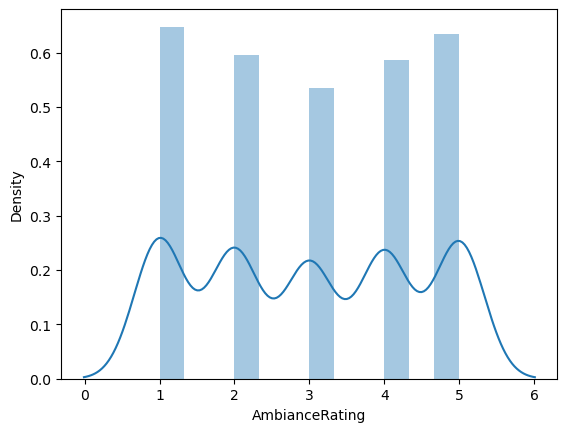

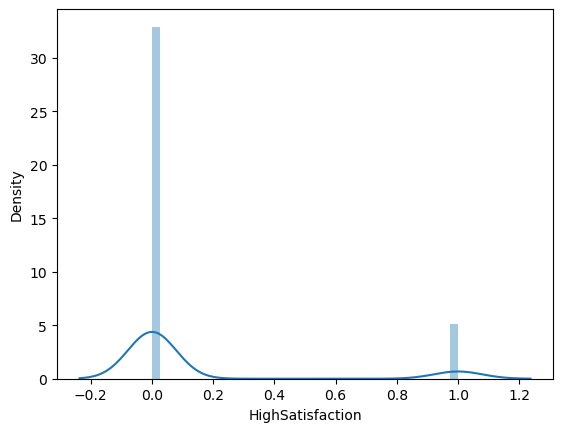

In [25]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

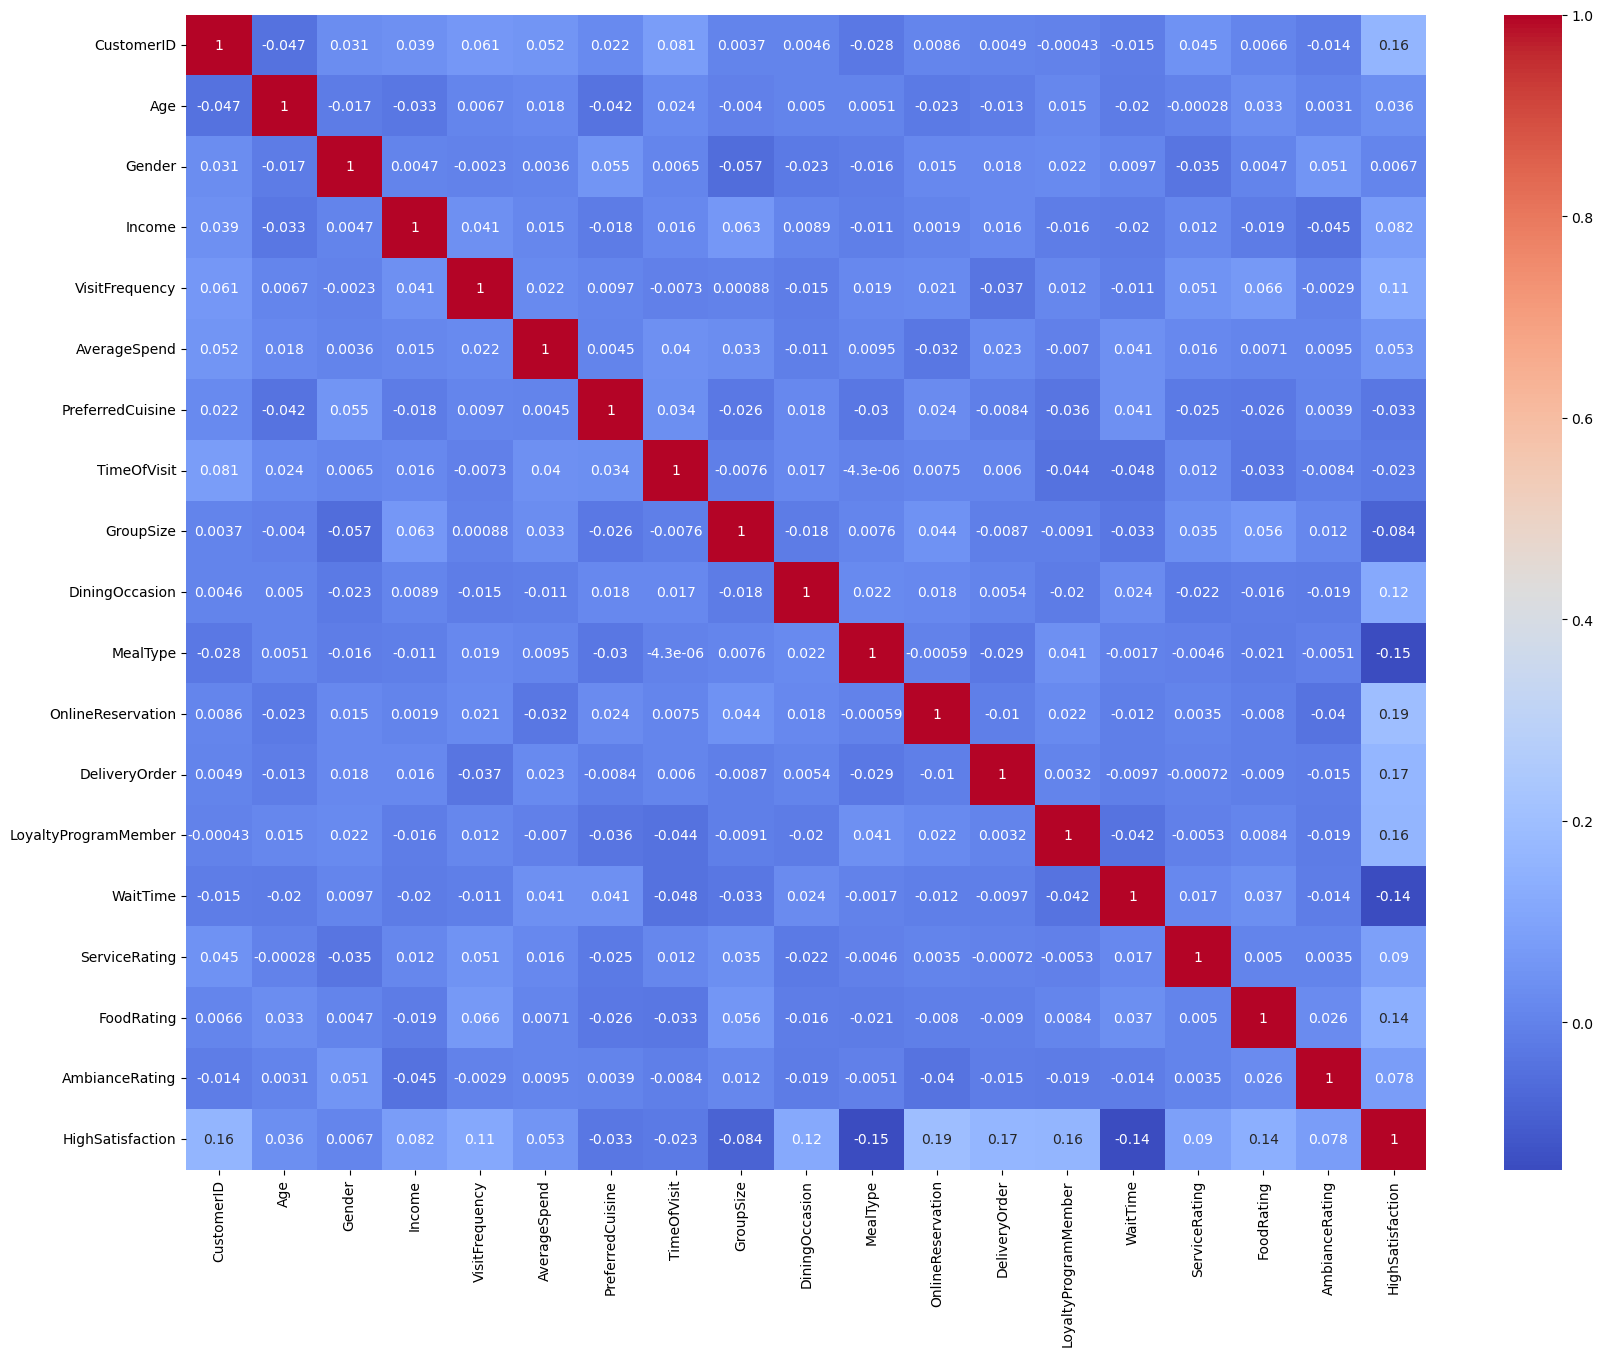

In [26]:
#CORRELATION
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

SPLI THE DATA INTO INDEPEDENT AND DEPENDENT VARIABLE

In [28]:
x=df.drop(['Age','HighSatisfaction'], axis=1)
y=df['HighSatisfaction']

FEATURE SCALING

In [30]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
x=sca.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

LOGISTIC REGRESSION AND ITS MODEL EVALUATION

In [33]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(x_train,y_train)

LogisticRegression()

In [34]:
yhat_train_lreg=lreg.predict(x_train)
yhat_test_lreg=lreg.predict(x_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
print(classification_report(y_train, yhat_train_lreg))
print()
print(classification_report(y_test, yhat_test_lreg))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1035
           1       0.73      0.39      0.51       165

    accuracy                           0.90      1200
   macro avg       0.82      0.69      0.73      1200
weighted avg       0.89      0.90      0.88      1200


              precision    recall  f1-score   support

           0       0.92      0.97      0.94       264
           1       0.59      0.36      0.45        36

    accuracy                           0.89       300
   macro avg       0.75      0.66      0.69       300
weighted avg       0.88      0.89      0.88       300



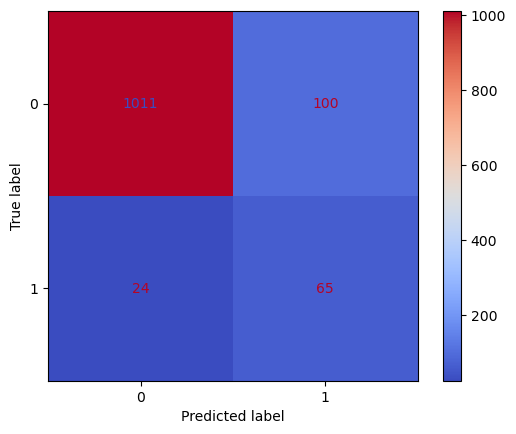

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_train_lreg, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

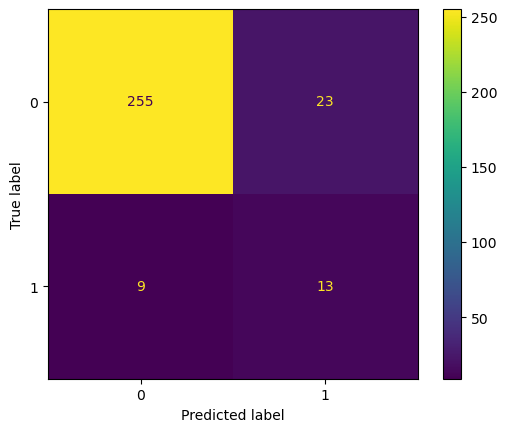

In [38]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat_test_lreg, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lreg, x, y, cv=3)
np.mean(scores)

0.8653333333333334

RANDOM FOREST AND ITS MODEL EVALUATION

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
yhat1_train_rfc=rfc.predict(x_train)
yhat1_test_rfc=rfc.predict(x_test)

In [43]:
print(classification_report(y_train, yhat1_train_rfc))
print()
print(classification_report(y_test, yhat1_test_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       165

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       264
           1       0.80      0.11      0.20        36

    accuracy                           0.89       300
   macro avg       0.85      0.55      0.57       300
weighted avg       0.88      0.89      0.85       300



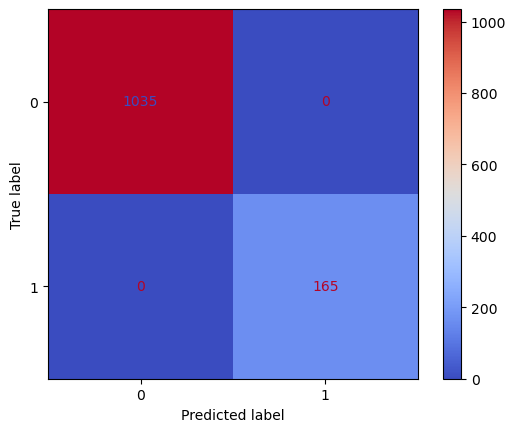

In [44]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat1_train_rfc, y_train))
c_matrix.plot(cmap='coolwarm')
plt.show()

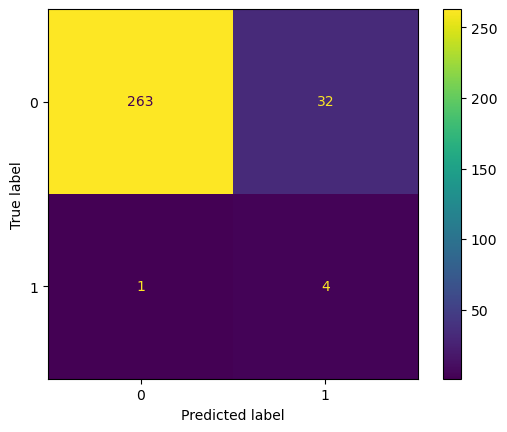

In [45]:
c_matrix=ConfusionMatrixDisplay(confusion_matrix(yhat1_test_rfc, y_test))
c_matrix.plot(cmap='viridis')
plt.show()

In [46]:
score=cross_val_score(rfc, x, y, cv=3)
np.mean(scores)

0.8653333333333334

CONCLUSION

THE MODELS USED HAD THEIR BEST ACCURACY OF:

REGRESSION MODEL 86%

RANDOM FOREST    86%